# Studio di funzione con Python

Questo notebook mostra **un esempio completo** di studio di funzione, sia dal punto di vista teorico e sia dal punto di vista "pratico" in Python.

Useremo la funzione razionale:

\[
f(x)=\frac{x^2-1}{x-2}
\]

Questa usata per vedere chiaramente:
- **condizioni di esistenza** (dominio con esclusione di un punto),
- **intersezioni con gli assi**,
- **asintoto verticale** e **asintoto obliquo**,
- **studio del segno** tramite un’inequazione,
- **studio della derivata prima** con **massimo/minimo relativo**.

> Nota: nel grafico la funzione viene disegnata su due rami separati, evitando l’intorno dell’asintoto verticale.


## Librerie utilizzate

Per svolgere i calcoli simbolici (dominio, asintoti, derivata, disequazioni) utilizziamo **SymPy**.  
Per disegnare i grafici utilizziamo **NumPy** (per campionare i valori) e **Matplotlib** (per il plot).  


In [27]:
import numpy as np # Libreria per il calcolo numerico
import matplotlib.pyplot as plt # Libreria per la grafica
import sympy as sp # Libreria per il calcolo simbolico

## Definizione della funzione

Definiamo la variabile simbolica \(x\) e la funzione \(f(x)\).  
In seguito costruiremo anche una versione “numerica” per tracciare il grafico.


In [28]:
x = sp.Symbol('x', real=True) # Definisco la variabile simbolica x
# sp.Symbol è usato per creare variabili simboliche in SymPy
# real=True indica che x è una variabile reale
# x quindi, non un numero, ma un simbolo matematico su cui possiamo fare algebra, limiti, derivate, equazioni, ecc.

f = (x**2 - 1) / (x - 2) # Definisco la funzione f(x) = (x^2 - 1) / (x - 2)
sp.simplify(f) # Semplifico la funzione f


(x**2 - 1)/(x - 2)

In [29]:
# Versione numerica (per il grafico)
f_num = sp.lambdify(x, f, modules=["numpy"]) # Converto la funzione simbolica f in una funzione numerica f_num


# 1) Dominio (condizioni di esistenza)

## Teoria

Il **dominio** di una funzione è l’insieme dei valori reali per cui la funzione è definita.

Nel caso delle **funzioni razionali**:

\[
f(x)=\frac{p(x)}{q(x)}
\]

la funzione è definita per tutti i reali **tranne** quelli che annullano il denominatore, cioè i valori per cui:

\[
q(x)=0
\]

Nel nostro caso:

\[
f(x)=\frac{x^2-1}{x-2}
\]

il denominatore è \(x-2\). La condizione di esistenza è:

\[
x-2 \neq 0 \quad \Rightarrow \quad x \neq 2
\]

Quindi:

\[
D_f = \mathbb{R}\setminus\{2\}
\]

## Visualizzazione
Nel grafico viene evidenziata la discontinuità, tracciando la retta verticale \(x=2\) e disegnando i due rami della funzione separatamente.


In [33]:
# Dominio: valori che annullano il denominatore
den = sp.denom(f) # Prendo il denominatore della funzione f
punti_esclusi = sp.solve(sp.Eq(den, 0), x) # Risolvo l'equazione den = 0 per trovare i
print(punti_esclusi)


[2]


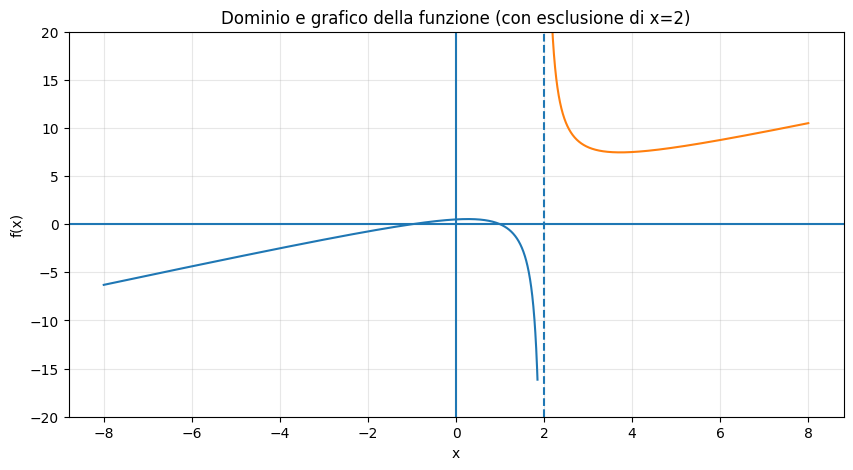

In [ ]:
# Grafico del dominio (e della funzione) con la discontinuità evidenziata

x0 = float(punti_esclusi[0])  # Qui è 2, prendo punti_esclusi[0], ovvero il primo numero della lista e lo converto in float

# Intervalli di campionamento evitando un intorno dell'asintoto verticale
eps = 0.15 # Piccolo valore per evitare la discontinuità
x_left = np.linspace(-8, x0 - eps, 2000) # Intervallo a sinistra di x0
x_right = np.linspace(x0 + eps, 8, 2000) # Intervallo a destra di x0

y_left = f_num(x_left) # Calcolo i valori della funzione a sinistra di x0
y_right = f_num(x_right) # Calcolo i valori della funzione a destra di x0

plt.figure(figsize=(10, 5)) # Dimensione della figura
plt.axhline(0)                      # Asse x
plt.axvline(0)                      # Asse y
plt.axvline(x0, linestyle="--")     # Discontinuità / asintoto verticale (sarà confermato dopo)

plt.plot(x_left, y_left) # Grafico a sinistra di x0
plt.plot(x_right, y_right) # Grafico a destra di x0

# Personalizzazioni del grafico
plt.title("Dominio e grafico della funzione (con esclusione di x=2)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-20, 20)
plt.grid(True, alpha=0.3)
plt.show()


# 2) Intersezioni con gli assi

## Teoria

### Intersezione con l’asse \(x\)
Un punto di intersezione con l’asse \(x\) si ottiene imponendo:

\[
f(x)=0
\]

Per una funzione razionale, questo avviene (quando possibile) annullando il numeratore e verificando che il denominatore non sia nullo:

\[
\frac{p(x)}{q(x)}=0 \quad \Rightarrow \quad p(x)=0 \ \text{e}\ q(x)\neq 0
\]

### Intersezione con l’asse \(y\)
L’intersezione con l’asse \(y\) si ottiene ponendo \(x=0\) (se \(0\) appartiene al dominio):

\[
(0, f(0))
\]

## Visualizzazione
Nel grafico vengono evidenziati i punti di intersezione trovati.


In [35]:
# Intersezioni con l'asse x: f(x)=0 -> numeratore=0 (con controllo sul denominatore)
num = sp.factor(sp.numer(f)) # Prendo il numeratore della funzione f e lo fattorizzo
sol_x = sp.solve(sp.Eq(num, 0), x) # Risolvo l'equazione num = 0 per trovare le intersezioni con l'asse x  
sol_x # Mostro le soluzioni (come print(sol_x))


[-1, 1]

In [36]:
# Intersezione con l'asse y: x=0 (se nel dominio)
f0 = sp.simplify(f.subs(x, 0)) # Calcolo f(0) sostituendo x=0 nella funzione f
f0


1/2

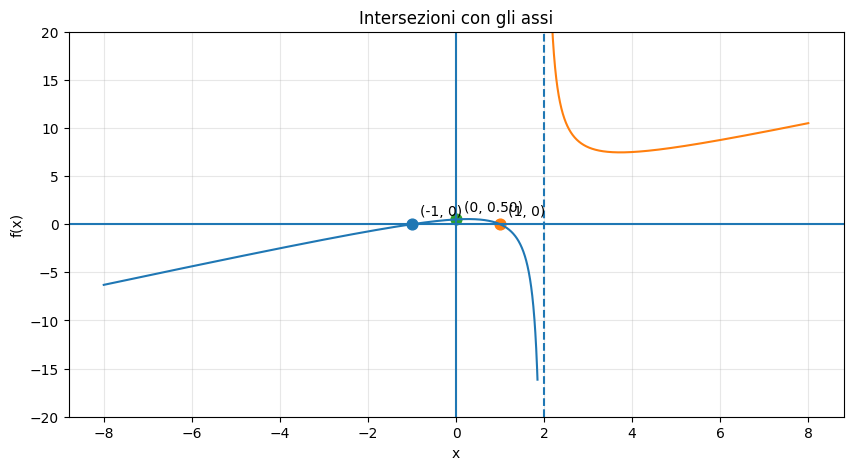

In [37]:
# Grafico con punti di intersezione evidenziati

# Punti asse x
punti_x = [(float(s), 0.0) for s in sol_x]

# Punto asse y
punto_y = (0.0, float(f0))

# Intervalli di campionamento evitando un intorno dell'asintoto verticale
plt.figure(figsize=(10, 5))
plt.axhline(0)
plt.axvline(0)
plt.axvline(x0, linestyle="--")

# Ricalcolo i valori della funzione per il grafico
plt.plot(x_left, y_left)
plt.plot(x_right, y_right)

# Disegno e etichette
for px, py in punti_x:
    plt.scatter([px], [py], s=60)
    plt.annotate(f"({px:.0f}, {py:.0f})", (px, py), textcoords="offset points", xytext=(6, 6))

# Punto asse y
plt.scatter([punto_y[0]], [punto_y[1]], s=60)
plt.annotate(f"(0, {punto_y[1]:.2f})", punto_y, textcoords="offset points", xytext=(6, 6))

# Personalizzazioni del grafico
plt.title("Intersezioni con gli assi")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-20, 20)
plt.grid(True, alpha=0.3)
plt.show()


# 3) Asintoti (verticali, orizzontali, obliqui)

## Teoria

Un **asintoto** descrive il comportamento della funzione quando \(x\) tende a un valore particolare o all’infinito.

### Asintoto verticale
Una retta \(x=a\) è asintoto verticale se:

\[
\lim_{x\to a^-} f(x)=\pm\infty \quad \text{oppure} \quad \lim_{x\to a^+} f(x)=\pm\infty
\]

Per le funzioni razionali spesso coincide con gli zeri del denominatore (quando non vengono semplificati).

### Asintoto orizzontale
Una retta \(y=L\) è asintoto orizzontale se:

\[
\lim_{x\to +\infty} f(x)=L \quad \text{oppure} \quad \lim_{x\to -\infty} f(x)=L
\]

### Asintoto obliquo
Una retta \(y=mx+q\) è asintoto obliquo se (con \(m\neq 0\)):

\[
\lim_{x\to \pm\infty} \left[f(x)-(mx+q)\right]=0
\]

Nel caso delle funzioni razionali, quando il grado del numeratore supera di 1 quello del denominatore, si ottiene spesso un asintoto obliquo tramite la divisione tra polinomi.

## Visualizzazione
Tracciamo gli asintoti e li mostriamo direttamente sul grafico.


In [38]:
# Asintoto verticale: candidato x=2, controlliamo i limiti laterali
lim_sx = sp.limit(f, x, x0, dir='-')
lim_dx = sp.limit(f, x, x0, dir='+')
lim_sx, lim_dx


(-oo, oo)

In [39]:
# Studio all'infinito: limiti per +inf e -inf
lim_inf_p = sp.limit(f, x, sp.oo)
lim_inf_m = sp.limit(f, x, -sp.oo)
lim_inf_p, lim_inf_m

# Non ci sono asintoti orizzontali, in quando non tende ad un numero finito il limite, ma obliqui: calcoliamo m e q


(oo, -oo)

In [40]:
# Ricaviamo l'asintoto obliquo tramite divisione (se presente)
quo, rem = sp.div(x**2 - 1, x - 2)  # divisione euclidea
quo, rem


(x + 2, 3)

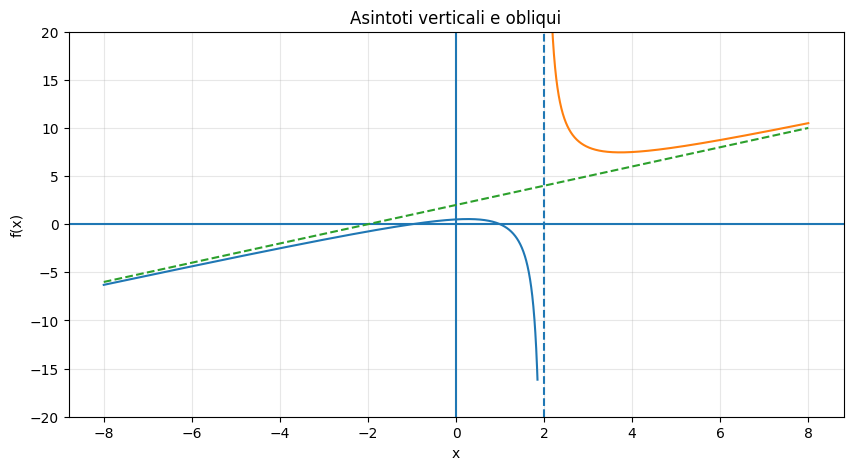

In [41]:
# Asintoto obliquo: y = quo = x + 2
asintoto_obliquo = quo
as_num = sp.lambdify(x, asintoto_obliquo, modules=["numpy"])

# Grafico con asintoti
xx = np.linspace(-8, 8, 800)

plt.figure(figsize=(10, 5))
plt.axhline(0)
plt.axvline(0)

# funzione (a tratti)
plt.axvline(x0, linestyle="--")  # asintoto verticale
plt.plot(x_left, y_left)
plt.plot(x_right, y_right)

# asintoto obliquo
plt.plot(xx, as_num(xx), linestyle="--")

plt.title("Asintoti verticali e obliqui")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-20, 20)
plt.grid(True, alpha=0.3)
plt.show()


# 4) Studio del segno

## Teoria

Lo **studio del segno** consiste nel determinare per quali valori di \(x\) la funzione è:
- positiva,
- negativa,
- nulla.

Nel caso di una funzione razionale, si può procedere:
1. fattorizzando numeratore e denominatore,
2. individuando gli zeri del numeratore (punti in cui \(f(x)=0\)),
3. individuando i punti esclusi del dominio (zeri del denominatore),
4. costruendo una tabella dei segni per intervalli.

## Visualizzazione
Nel grafico evidenziamo gli intervalli di \(x\) per cui vale il segno tramite bande verticali sul piano.


In [42]:
# Risoluzione simbolica della disequazione f(x) >= 0
ineq = sp.Ge(f, 0)
sol_sign = sp.solve_univariate_inequality(ineq, x, relational=False)
sol_sign


Union(Interval(-1, 1), Interval.open(2, oo))

In [43]:
# Funzione di supporto: dato un insieme soluzione SymPy, prova a estrarre intervalli per la visualizzazione
def estrai_intervalli(soluzione):
    intervalli = []
    # SymPy può restituire Union, Interval, FiniteSet, ecc.
    if isinstance(soluzione, sp.Union):
        for s in soluzione.args:
            intervalli += estrai_intervalli(s)
    elif isinstance(soluzione, sp.Interval):
        intervalli.append(soluzione)
    elif isinstance(soluzione, sp.FiniteSet):
        # punti singoli (li mettiamo come intervalli degeneri)
        for p in soluzione:
            intervalli.append(sp.Interval(p, p))
    else:
        # fallback: prova a trattare come Interval
        try:
            if hasattr(soluzione, 'start') and hasattr(soluzione, 'end'):
                intervalli.append(soluzione)
        except Exception:
            pass
    return intervalli

intervalli_segno = estrai_intervalli(sol_sign)
intervalli_segno


[Interval(-1, 1), Interval.open(2, oo)]

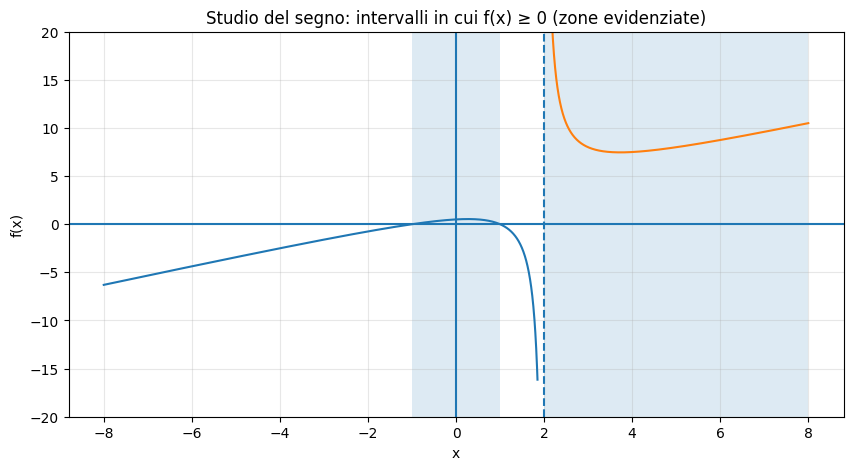

In [44]:
# Grafico con evidenziazione degli intervalli dove f(x) >= 0
plt.figure(figsize=(10, 5))
ax = plt.gca()

plt.axhline(0)
plt.axvline(0)
plt.axvline(x0, linestyle="--")

plt.plot(x_left, y_left)
plt.plot(x_right, y_right)

# evidenzio gli intervalli (tagliati alla finestra di visualizzazione [-8, 8])
xmin, xmax = -8, 8
for inter in intervalli_segno:
    a = float(inter.start) if inter.start.is_real else xmin
    b = float(inter.end) if inter.end.is_real else xmax
    
    # gestiamo intervalli aperti/chiusi: per la banda visiva va bene comunque
    a = max(a, xmin)
    b = min(b, xmax)
    if a <= b:
        ax.axvspan(a, b, alpha=0.15)

plt.title("Studio del segno: intervalli in cui f(x) ≥ 0 (zone evidenziate)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-20, 20)
plt.grid(True, alpha=0.3)
plt.show()


# 5) Studio della derivata prima: massimi e minimi relativi

## Teoria

La **derivata prima** \(f'(x)\) descrive la variazione della funzione:
- se \(f'(x)>0\), la funzione è crescente;
- se \(f'(x)<0\), la funzione è decrescente;
- se \(f'(x)=0\), si hanno punti **critici** (candidati a massimo/minimo relativo).

Per individuare massimi e minimi relativi si procede in genere così:
1. si calcola \(f'(x)\);
2. si risolve \(f'(x)=0\) nel dominio;
3. si studia il segno di \(f'(x)\) oppure si usa la derivata seconda per classificare i punti.

In questo notebook useremo la **derivata seconda** per classificare:
- se \(f''(x_c)>0\) allora \(x_c\) è un **minimo relativo**;
- se \(f''(x_c)<0\) allora \(x_c\) è un **massimo relativo**.

## Visualizzazione
Mostriamo i punti di massimo/minimo sul grafico della funzione.


In [ ]:
# Derivata prima e seconda
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)

sp.simplify(f1), sp.simplify(f2)


In [ ]:
# Punti critici: risolvo f'(x)=0 e poi filtro quelli nel dominio
critici = sp.solve(sp.Eq(f1, 0), x)
critici


In [ ]:
# Classificazione con la derivata seconda e calcolo delle coordinate (x, f(x))
punti_ext = []
for xc in critici:
    if xc != x0:  # rispetto al dominio (qui basta, perché l'unico escluso è 2)
        val_f2 = sp.N(f2.subs(x, xc))
        tipo = "minimo" if val_f2 > 0 else "massimo" if val_f2 < 0 else "indefinito"
        punti_ext.append((float(sp.N(xc)), float(sp.N(f.subs(x, xc))), tipo))

punti_ext


In [ ]:
# Grafico con massimi/minimi evidenziati
plt.figure(figsize=(10, 5))
plt.axhline(0)
plt.axvline(0)
plt.axvline(x0, linestyle="--")

plt.plot(x_left, y_left)
plt.plot(x_right, y_right)

for xc, yc, tipo in punti_ext:
    plt.scatter([xc], [yc], s=80)
    plt.annotate(f"{tipo}\n({xc:.2f}, {yc:.2f})", (xc, yc),
                 textcoords="offset points", xytext=(8, 8))

plt.title("Derivata prima: punti di massimo/minimo relativo")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-20, 20)
plt.grid(True, alpha=0.3)
plt.show()
